Shayan Golshan

# 2022 NYC Homicide Data Analysis

### In this notebook, I wanted to uncover what neighborhoods in NYC were experiencing the greatest amount of homicides.  Included in (but not limited to) this data are the circumstances, perpetrator/victim ages, and the weapons used in each case.  I hope to understand where these events are occuring, what types of disagreements are causing these killings, and the most frequently used weapons.

## Importing Libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import cluster, decomposition, preprocessing
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from yellowbrick.cluster.silhouette import SilhouetteVisualizer
import missingno as mn
import matplotlib.patches as mpatches

## Reading in the Data

In [2]:
df = pd.read_excel('./supplementary-homicide-report-cy2022.xlsx')
df = df.drop(columns='VICTIM<1')
df

,SHOOTING HOMICIDE INCIDENT ID-ANONY,Date,Month,Precinct Code,PATROL BOROUGH,BOROUGH,VICTIM BIRTH DATE,VICTIM AGE,VICTIM SEX,VICTIM RACE,...,PERP VICTIM RELATIONSHIP,VCTIM PERP RELATIONSHIP,WEAPON USE,CIRCUMSTANCE,OTHER CIRCUMSTANCE,IN/OUT,CASE NUMBER,RECORD NUMBER,VICTIM NUMBER,DOMESTIC
0,44289,2022-02-21,2,32,PBMN,MANHATTAN,1980-05-14,24,M,BLACK,...,UNKNOWN RELATIONSHIP,UNKNOWN RELATIONSHIP,HANDGUN,OTHER ARGUMENT,OVR GIRL/BOY(DISP),I,1,1,1,NaN
1,46693,2022-04-07,4,73,PBBN,BROOKLYN,1982-09-11,23,M,BLACK,...,STRANGER,STRANGER,HANDGUN,OTHER ARGUMENT,OVR GIRL/BOY(DISP),O,2,1,2,NaN
2,74567,2022-01-01,1,114,PBQN,QUEENS,1980-06-06,41,F,ASIAN / PACIFIC ISLANDER,...,FRIEND,FRIEND,CUTTING/STABBING,OTHER,REVENGE,O,3,1,3,NaN
3,74569,2022-01-02,1,79,PBBN,BROOKLYN,1985-02-11,36,F,BLACK HISPANIC,...,STRANGER,STRANGER,HANDGUN,OTHER,UNKNOWN,I,4,1,4,NaN
4,74576,2022-01-05,1,44,PBBX,BRONX,1972-06-14,49,M,BLACK,...,FRIEND,FRIEND,CUTTING/STABBING,OTHER ARGUMENT,PREVIOUS HISTORY (DISP),I,5,1,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,76373,2022-12-24,12,14,PBMS,MANHATTAN,1961-11-14,61,M,BLACK,...,NaN,NaN,"HANDS,FISTS,ECT.",UNKNOWN,UNKNOWN,O,434,1,434,NaN
434,76379,2022-09-03,9,49,PBBX,BRONX,1957-04-18,65,M,BLACK,...,FRIEND,FRIEND,"HANDS,FISTS,ECT.",OTHER ARGUMENT,UNKNOWN,O,435,1,435,NaN
435,76427,2022-09-25,9,104,PBQN,QUEENS,1941-10-18,81,M,WHITE HISPANIC,...,FRIEND,FRIEND,"HANDS,FISTS,ECT.",OTHER ARGUMENT,UNKNOWN,I,436,1,436,NaN
436,76435,2022-02-25,2,49,PBBX,BRONX,1968-11-29,54,F,BLACK,...,NaN,NaN,OTHER,UNKNOWN,UNKNOWN,O,437,1,437,NaN


In [3]:
df.columns

Index(['SHOOTING HOMICIDE INCIDENT ID-ANONY', 'Date', 'Month', 'Precinct Code',
       'PATROL BOROUGH', 'BOROUGH', 'VICTIM BIRTH DATE', 'VICTIM AGE',
       'VICTIM SEX', 'VICTIM RACE', 'VICTIM ETHNIC', 'PERP STATUS DESCRIPTION',
       'PERP AGE', 'PERP SEX', 'PERP RACE', 'PERP ETHNIC',
       'PERP VICTIM RELATIONSHIP', 'VCTIM PERP RELATIONSHIP', 'WEAPON USE',
       'CIRCUMSTANCE', 'OTHER CIRCUMSTANCE', 'IN/OUT', 'CASE NUMBER',
       'RECORD NUMBER', 'VICTIM NUMBER', 'DOMESTIC'],
      dtype='object')

In [4]:
df.dtypes

SHOOTING HOMICIDE INCIDENT ID-ANONY             int64
Date                                   datetime64[ns]
Month                                           int64
Precinct Code                                   int64
PATROL BOROUGH                                 object
BOROUGH                                        object
VICTIM BIRTH DATE                      datetime64[ns]
VICTIM AGE                                      int64
VICTIM SEX                                     object
VICTIM RACE                                    object
VICTIM ETHNIC                                  object
PERP STATUS DESCRIPTION                        object
PERP AGE                                      float64
PERP SEX                                       object
PERP RACE                                      object
PERP ETHNIC                                    object
PERP VICTIM RELATIONSHIP                       object
VCTIM PERP RELATIONSHIP                        object
WEAPON USE                  

# Let's visualize the null values

<Axes: >

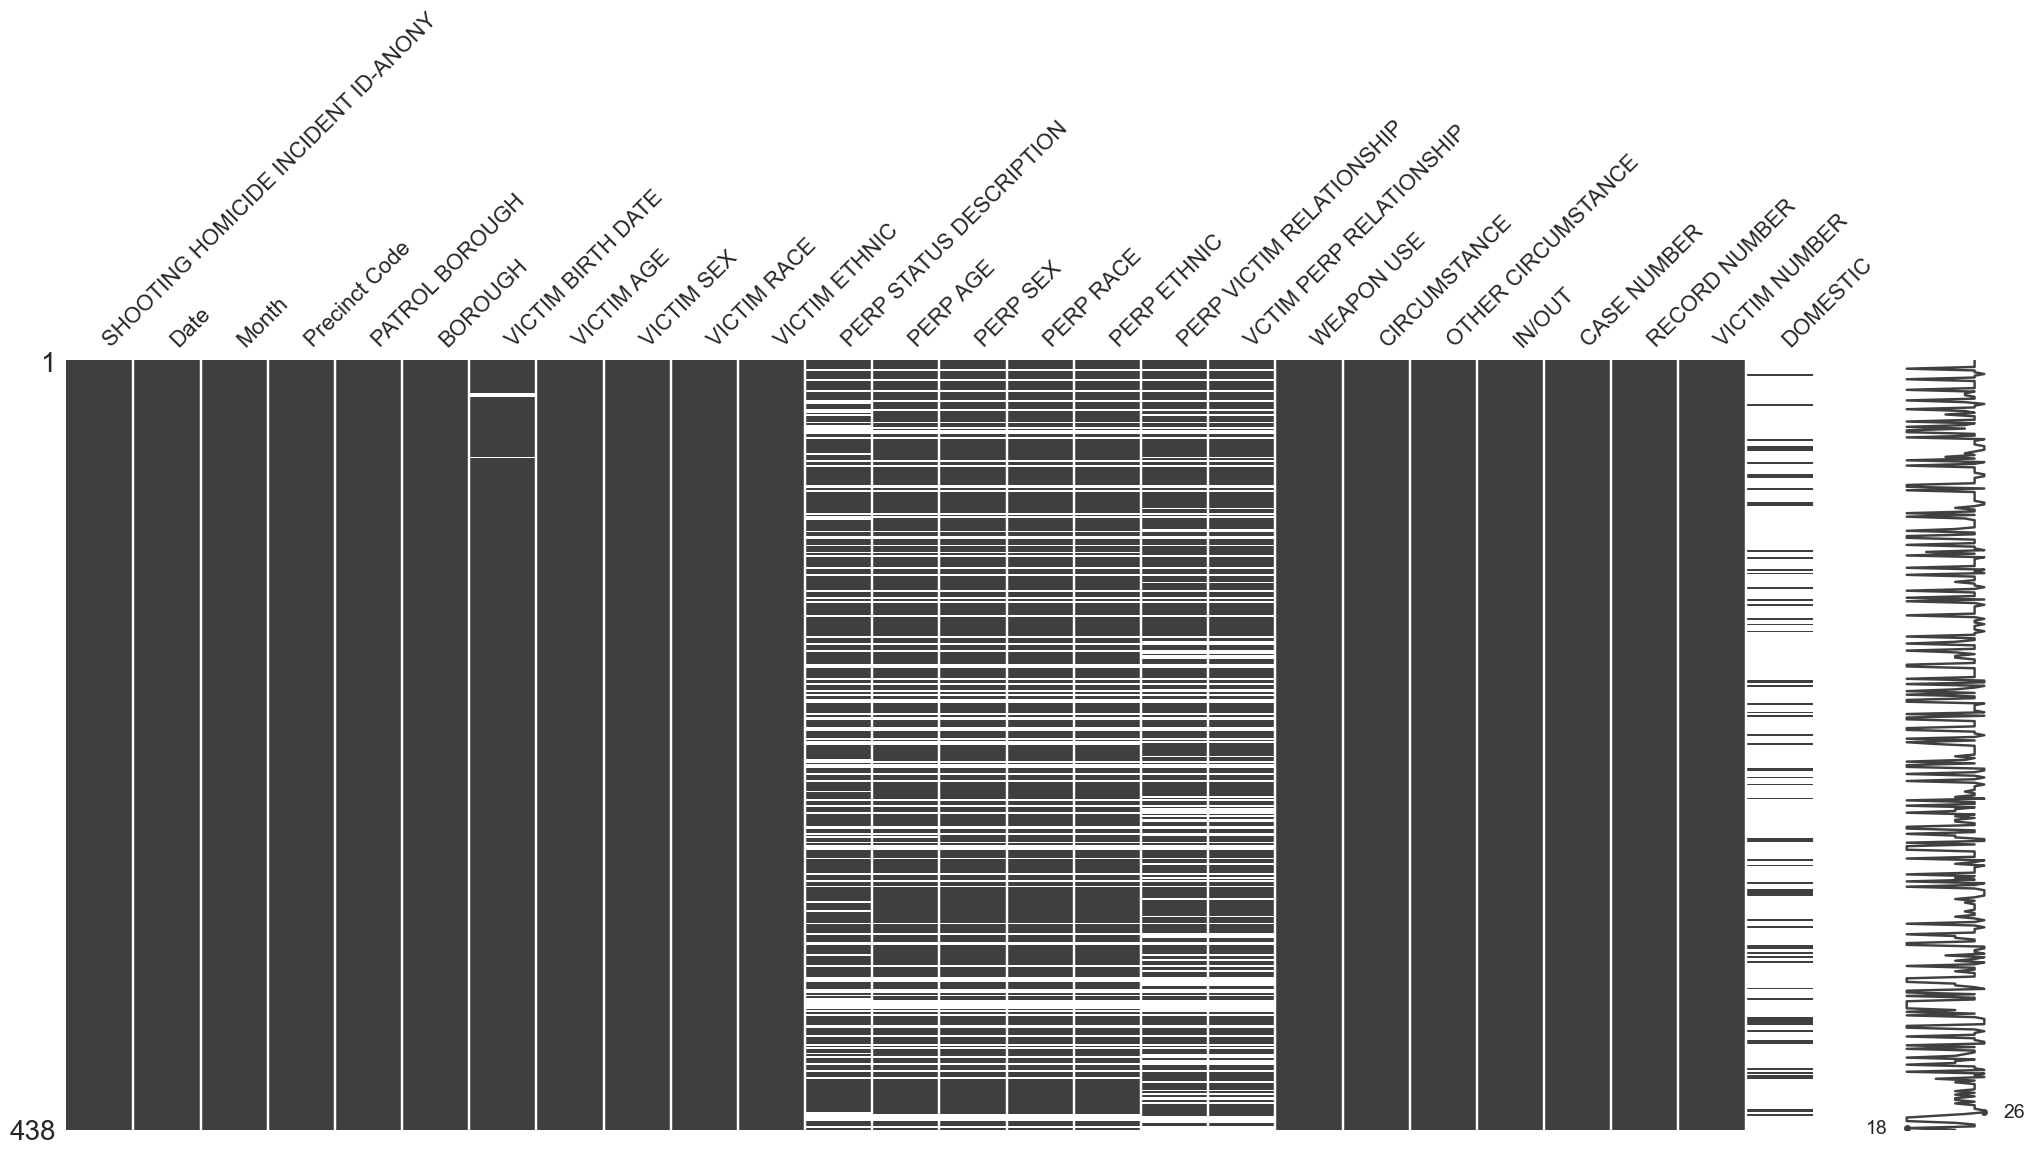

In [5]:
mn.matrix(df)

### Let's deal with the null values in one of the columns that we are interested in using and fix one of the columns.  It looks like there are a lot of missing values for the Perp ages.  This could be due to the fact that that person is still at large or was not caught.   

In [6]:
df['DOMESTIC'] = df['DOMESTIC'].apply(lambda x: 1 if str(x).lower() == 'y' else 0 if pd.notnull(x) else 0)
df['PERP AGE FILLED'] = df['PERP AGE'].fillna(0).astype(int)

In [7]:
df.columns

Index(['SHOOTING HOMICIDE INCIDENT ID-ANONY', 'Date', 'Month', 'Precinct Code',
       'PATROL BOROUGH', 'BOROUGH', 'VICTIM BIRTH DATE', 'VICTIM AGE',
       'VICTIM SEX', 'VICTIM RACE', 'VICTIM ETHNIC', 'PERP STATUS DESCRIPTION',
       'PERP AGE', 'PERP SEX', 'PERP RACE', 'PERP ETHNIC',
       'PERP VICTIM RELATIONSHIP', 'VCTIM PERP RELATIONSHIP', 'WEAPON USE',
       'CIRCUMSTANCE', 'OTHER CIRCUMSTANCE', 'IN/OUT', 'CASE NUMBER',
       'RECORD NUMBER', 'VICTIM NUMBER', 'DOMESTIC', 'PERP AGE FILLED'],
      dtype='object')

In [8]:
zero_perp = df['PERP AGE FILLED'] == 0
df[zero_perp][['PERP AGE FILLED', 'PERP STATUS DESCRIPTION', 'OTHER CIRCUMSTANCE', 'PERP VICTIM RELATIONSHIP', 'VCTIM PERP RELATIONSHIP']].head(25)

,PERP AGE FILLED,PERP STATUS DESCRIPTION,OTHER CIRCUMSTANCE,PERP VICTIM RELATIONSHIP,VCTIM PERP RELATIONSHIP
5,0,NaN,DISPUTE,NaN,NaN
11,0,NaN,OVR GIRL/BOY(DISP),NaN,NaN
17,0,NaN,OTHER(DISP),NaN,NaN
23,0,NaN,UNKNOWN,NaN,NaN
28,0,NaN,UNKNOWN,NaN,NaN
35,0,NaN,UNKNOWN,NaN,NaN
38,0,NaN,UNKNOWN,NaN,NaN
40,0,NaN,UNKNOWN,NaN,NaN
41,0,NaN,UNKNOWN,NaN,NaN
44,0,NaN,UNKNOWN,NaN,NaN


Since a lot of these values are missing in the dataset, it leads me to believe that these perpetrators were not apprehended and the NYPD was not able to collect information on them.  When making visualizations later on, I will omit the NA values, because treating them as 0 may distort the distributions of my data.  Excluding the NAs would represent the actual distribution of the datapoints in my dataset and give a more clear picture of the population.

### Label Encoding Function to convert categorical data into numerical format for doing machine learning later on

In [9]:
# Values that had null or 0 are put into their own group (usually the last number in the series)
def label_encode_dataframe(df):
    label_encoder = LabelEncoder()
    df_encoded = df.copy()
    for column in df_encoded.columns:
        if df_encoded[column].dtype == 'object':
            df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
    return df_encoded

df_label_encoded = label_encode_dataframe(df)
df_label_encoded

,SHOOTING HOMICIDE INCIDENT ID-ANONY,Date,Month,Precinct Code,PATROL BOROUGH,BOROUGH,VICTIM BIRTH DATE,VICTIM AGE,VICTIM SEX,VICTIM RACE,...,VCTIM PERP RELATIONSHIP,WEAPON USE,CIRCUMSTANCE,OTHER CIRCUMSTANCE,IN/OUT,CASE NUMBER,RECORD NUMBER,VICTIM NUMBER,DOMESTIC,PERP AGE FILLED
0,44289,2022-02-21,2,32,3,2,1980-05-14,24,1,1,...,11,4,3,11,0,1,1,1,0,22
1,46693,2022-04-07,4,73,0,1,1982-09-11,23,1,1,...,10,4,3,11,1,2,1,2,0,22
2,74567,2022-01-01,1,114,5,3,1980-06-06,41,0,0,...,3,2,2,14,1,3,1,3,0,60
3,74569,2022-01-02,1,79,0,1,1985-02-11,36,0,2,...,10,4,2,19,0,4,1,4,0,36
4,74576,2022-01-05,1,44,2,0,1972-06-14,49,1,1,...,3,2,3,12,0,5,1,5,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,76373,2022-12-24,12,14,4,2,1961-11-14,61,1,1,...,12,5,7,19,1,434,1,434,0,34
434,76379,2022-09-03,9,49,2,0,1957-04-18,65,1,1,...,3,5,3,19,1,435,1,435,0,33
435,76427,2022-09-25,9,104,5,3,1941-10-18,81,1,5,...,3,5,3,19,0,436,1,436,0,89
436,76435,2022-02-25,2,49,2,0,1968-11-29,54,0,1,...,12,8,7,19,1,437,1,437,0,0


# EDA

In [10]:
df.describe()

,SHOOTING HOMICIDE INCIDENT ID-ANONY,Date,Month,Precinct Code,VICTIM BIRTH DATE,VICTIM AGE,PERP AGE,CASE NUMBER,RECORD NUMBER,VICTIM NUMBER,DOMESTIC,PERP AGE FILLED
count,438.000000,438,438.000000,438.000000,435,438.000000,338.000000,438.000000,438.0,438.000000,438.000000,438.000000
mean,75381.664384,2022-07-01 08:03:17.260273920,6.486301,62.470320,1987-02-13 07:10:20.689655168,34.710046,32.201183,219.500000,1.0,219.500000,0.152968,24.849315
min,44289.000000,2022-01-01 00:00:00,1.000000,5.000000,1927-08-31 00:00:00,0.000000,14.000000,1.000000,1.0,1.000000,0.000000,0.000000
25%,75046.000000,2022-04-09 00:00:00,4.000000,43.000000,1977-09-12 12:00:00,24.000000,22.000000,110.250000,1.0,110.250000,0.000000,16.250000
50%,75539.000000,2022-07-02 00:00:00,7.000000,62.000000,1989-01-03 00:00:00,32.000000,29.500000,219.500000,1.0,219.500000,0.000000,25.000000
75%,76013.500000,2022-09-23 06:00:00,9.000000,78.000000,1998-03-19 12:00:00,44.000000,40.000000,328.750000,1.0,328.750000,0.000000,36.000000
max,76436.000000,2022-12-30 00:00:00,12.000000,123.000000,2022-08-03 00:00:00,94.000000,89.000000,438.000000,1.0,438.000000,1.000000,89.000000
std,2101.296936,NaN,3.334659,30.162076,NaN,15.618608,12.603556,126.583964,0.0,126.583964,0.360368,17.481606


All of the numerical columns are either categorical groupings, row labels, or a date time object.  The only columns that had continuous values that should be of focus are VICTIM AGE and PERP AGE.  Here is their information in a more concise table.

In [11]:
df[['PERP AGE', 'VICTIM AGE']].describe()

,PERP AGE,VICTIM AGE
count,338.000000,438.000000
mean,32.201183,34.710046
std,12.603556,15.618608
min,14.000000,0.000000
25%,22.000000,24.000000
50%,29.500000,32.000000
75%,40.000000,44.000000
max,89.000000,94.000000


From this table, our perps have an average age of 32.20, minimum of 14, and maximum of 89 years old.  Among our victims, their average age was 34.7, minimum of 0, and maximum of 94 years old.  Since a minimum victim age of 0 could be misleading, let's drill down into those observations and see what was going on there.   

In [12]:
df[['BOROUGH','PERP AGE','PERP SEX','PERP VICTIM RELATIONSHIP','VICTIM AGE','VCTIM PERP RELATIONSHIP','WEAPON USE', 'CIRCUMSTANCE', 'PERP STATUS DESCRIPTION']].sort_values('VICTIM AGE', ascending=True).head(10)

,BOROUGH,PERP AGE,PERP SEX,PERP VICTIM RELATIONSHIP,VICTIM AGE,VCTIM PERP RELATIONSHIP,WEAPON USE,CIRCUMSTANCE,PERP STATUS DESCRIPTION
387,BRONX,22.0,F,PARENT,0,CHILD,CUTTING/STABBING,OTHER,ARRESTED
108,BRONX,17.0,F,PARENT,0,CHILD,"HANDS,FISTS,ECT.",OTHER,ARRESTED
273,MANHATTAN,35.0,M,PARENT,0,CHILD,"HANDS,FISTS,ECT.",OTHER,ARRESTED
304,BROOKLYN,30.0,F,PARENT,0,CHILD,OTHER,OTHER,ARRESTED
426,BROOKLYN,25.0,M,PARENT,0,CHILD,"HANDS,FISTS,ECT.",OTHER,ARRESTED
119,BROOKLYN,44.0,M,PARENT,1,CHILD,NARCOTICS,DRUG RELATED TRANSACTION,ARRESTED
334,BROOKLYN,33.0,M,PARENT,2,CHILD,"HANDS,FISTS,ECT.",OTHER,ARRESTED
408,MANHATTAN,NaN,NaN,PARENT,2,CHILD,NARCOTICS,OTHER,NaN
429,STATEN ISLAND,NaN,NaN,PARENT,2,CHILD,NARCOTICS,OTHER,NaN
374,QUEENS,26.0,M,PARENT,3,CHILD,"HANDS,FISTS,ECT.",OTHER,ARRESTED


Sadly, it looks like here that there are a young group of abusive parents that have committed these crimes before their children got a chance to develop.  

## Distribution of the Perpetrator Ages

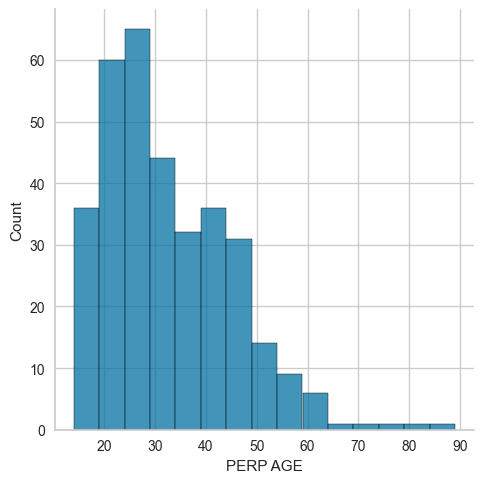

In [13]:
sns.displot(df['PERP AGE'])

When looking at the distribution of perpetrator ages, you can see that the tail moves to the right, showing how right-skewed the histogram is.  This tells us that a majority of the values peak within the left side of the graph and that the mean of the perp ages is greater than the median.  In our case, this suggests that the people that commited homicides in NYC in 2022 were of a generally younger population.  

## Distribution of the Victim Ages

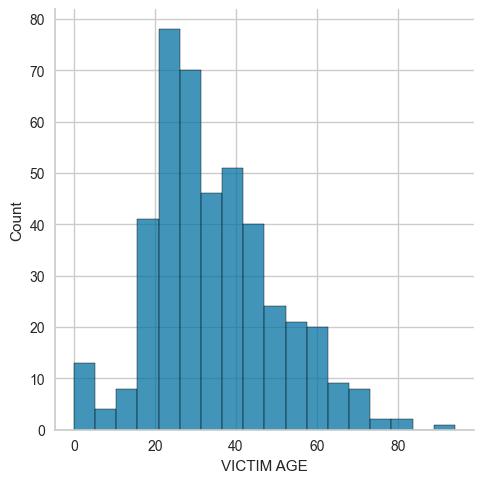

In [14]:
sns.displot(df['VICTIM AGE'])

This is also the case for the ages of the victims within this dataset.  Victim ages is right skewed, however, the skew on the PERP AGE graph is stronger, suggesting that the mean and median of victim ages are closer to one another.  Let's dive into the boxplots of the data to see another distribution and get a better idea of what our outliers look like.

## Outliers Visualized

<Axes: xlabel='BOROUGH', ylabel='PERP AGE'>

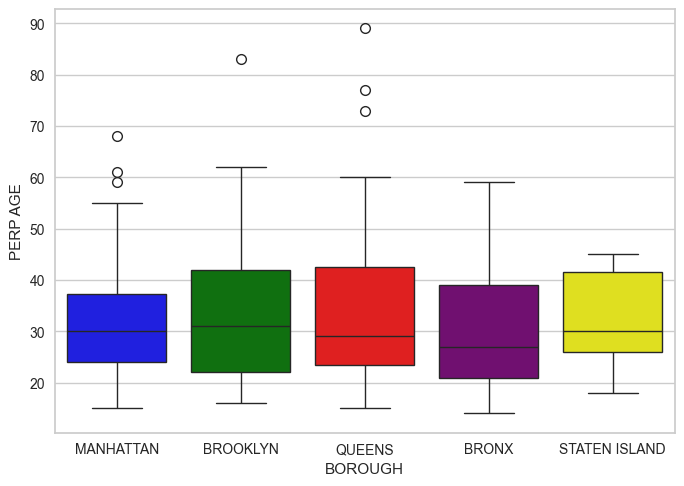

In [15]:
colors = {'MANHATTAN': 'blue', 'BRONX': 'purple', 'STATEN ISLAND': 'yellow', 'BROOKLYN': 'green', 'QUEENS': 'red'}
custom_palette = [colors[borough] for borough in df['BOROUGH'].unique()]
sns.boxplot(x='BOROUGH', y='PERP AGE', data=df, palette=custom_palette, hue='BOROUGH', legend=False)

Aside from the few outliers in Manhattan, Brooklyn, and Queens, you can see that the IQR of our perps are of a relatively young age.  The IQR ranges are consistent with our original table from above, visualizing the 75th percentile of the perps being 40 or younger.  

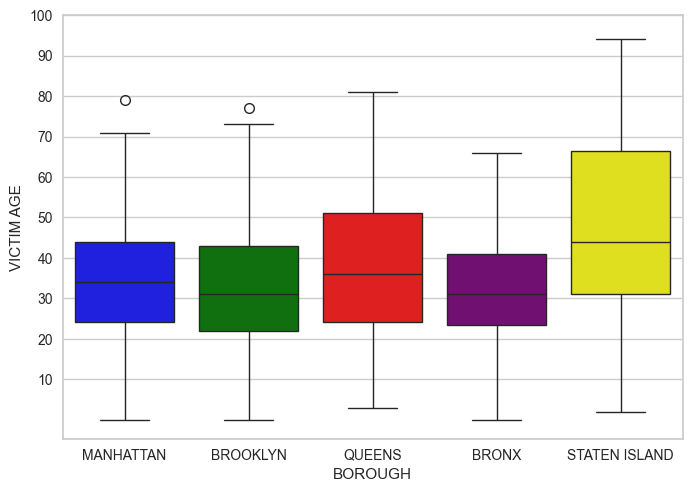

In [16]:
sns.boxplot(x='BOROUGH', y='VICTIM AGE', data=df, palette=custom_palette, hue='BOROUGH', legend=False)
plt.yticks(range(10, df['VICTIM AGE'].max() + 10, 10))
plt.show()

In this boxplot, you can see how IQRs of each Borough appear a bit wider suggesting that there is more spread in the victim ages within each borough compared to the perp ages.  This is probably why the skew of the victim ages are slightly less than that of the perp ages.  Since all of the boxplots indicate that that victims are slightly older than the perpetrators, this suggests a trend that victims tend to be older than the perpetrators on average.  We can investigate this by plotting some perp age vs victim age.

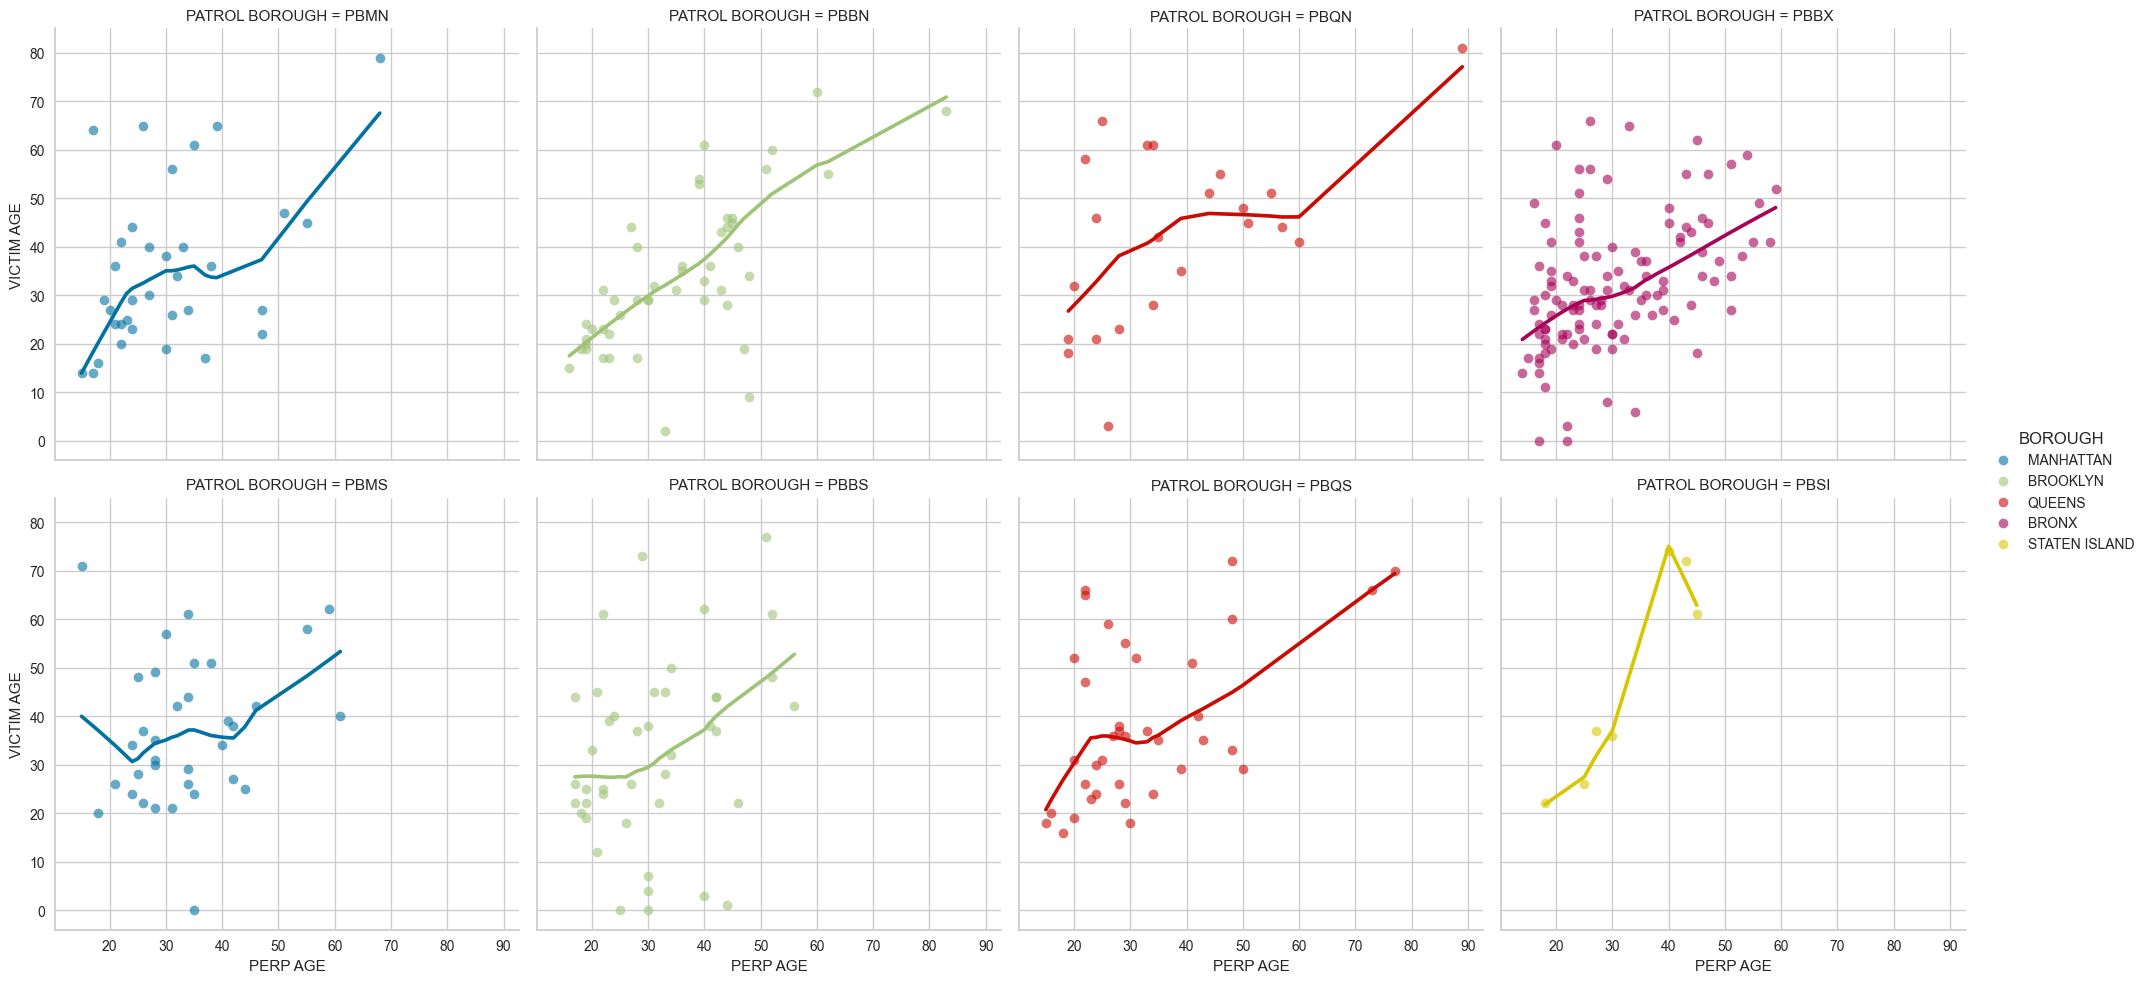

In [17]:
sns.lmplot(x='PERP AGE', y='VICTIM AGE', data=df, lowess=True,
           scatter_kws={'alpha':.6}, hue='BOROUGH', col = 'PATROL BOROUGH', col_wrap= 4, col_order= ['PBMN', 'PBBN', 'PBQN', 'PBBX', 'PBMS', 'PBBS', 'PBQS', 'PBSI'])

Plotting perpetrator age against victim age with a regression line yielded these results.  All of the regression lines were positive, suggesting that there is a positive correlation between the two columns.  This suggests that as the age of the perpetrator increases, so does the victim age.  Perps will often target victims of the same age group, however, since this only shows the correlation, it does not imply causation.  

## Deadliest Days

In [18]:
sorted_date = df.sort_values('Date', ascending = True)
sorted_date

daily_deaths = sorted_date.groupby('Date').size()
daily_deaths.sort_values(ascending=False)

Date
2022-08-27    6
2022-05-25    5
2022-06-24    5
2022-05-16    4
2022-05-15    4
             ..
2022-12-22    1
2022-12-24    1
2022-12-27    1
2022-12-28    1
2022-12-30    1
Length: 251, dtype: int64

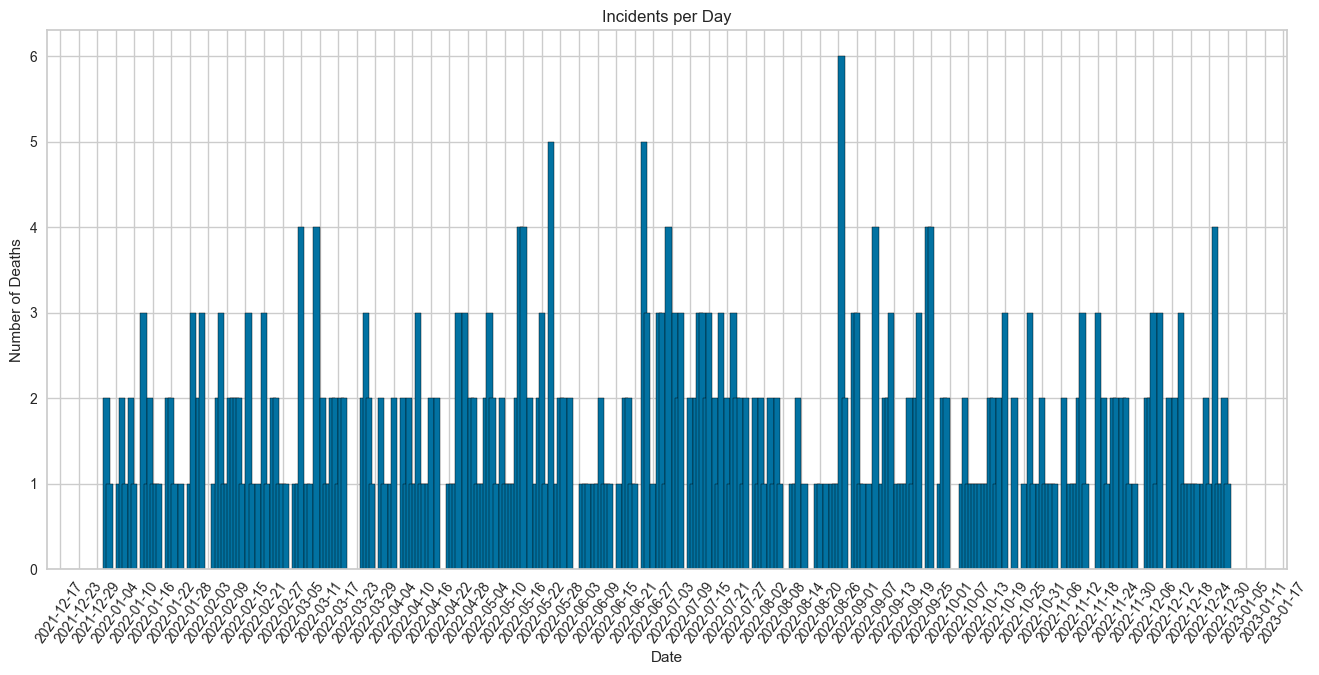

In [19]:
daily_deaths = sorted_date.groupby('Date').size()

fig, ax = plt.subplots(figsize=(16, 7))
ax.bar(daily_deaths.index, daily_deaths.values, width = 2, edgecolor = 'black')
ax.xaxis_date()
ax.xaxis.set_major_locator(plt.MaxNLocator(70))
ax.tick_params(axis='x', rotation=55)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Deaths')
ax.set_title('Incidents per Day')

plt.show()

Here, I just wanted to showcase the distribution of the homicides over the year.  You can see that the deadliest day was 2022-08-27 with 6 homicides recorded to the NYPD.

## Deadliest Borough

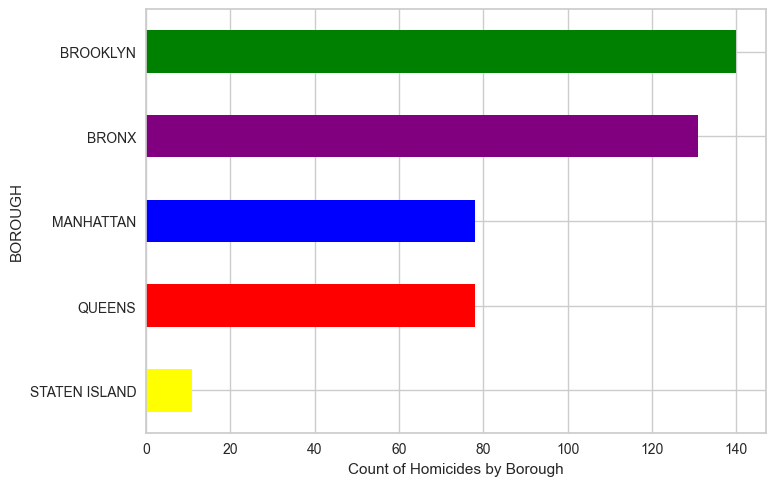

In [20]:
borough_counts = df.BOROUGH.value_counts()
limit = 15

top_borough_counts = borough_counts.iloc[:limit][::-1]
bar_colors = [colors[borough] for borough in top_borough_counts.index]
ax = (
    pd.concat([borough_counts.iloc[:limit]])
    .iloc[::-1]
    .plot.barh(color=bar_colors)
    .set_xlabel('Count of Homicides by Borough')
)

## Highest Frequency of Cases by Patrol Borough

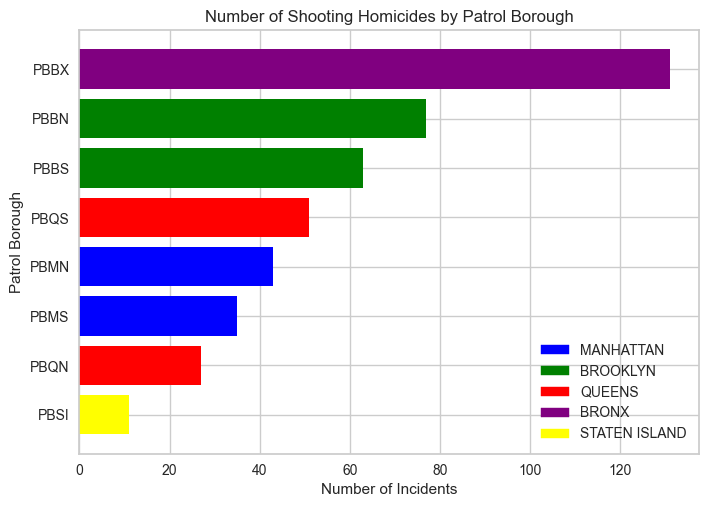

In [21]:
patrol_borough_counts = df['PATROL BOROUGH'].value_counts().iloc[::-1]
colors_dict = {
    'PBSI': 'yellow',
    'PBQN': 'red',
    'PBQS':'red',
    'PBBX': 'purple',
    'PBBN': 'green',
    'PBBS': 'green',
    'PBMN': 'blue',
    'PBMS': 'blue',
    'MANHATTAN': 'blue',
    'BRONX': 'purple',
    'STATEN ISLAND': 'yellow',
    'BROOKLYN': 'green',
    'QUEENS': 'red'
}

# Create a list of colors for each borough and patrol based on the colors_dict
colors = [colors_dict[borough] for borough in patrol_borough_counts.index]
plt.barh(patrol_borough_counts.index, patrol_borough_counts.values, color=colors)

plt.title("Number of Shooting Homicides by Patrol Borough")
plt.xlabel("Number of Incidents")
plt.ylabel("Patrol Borough")
borough_list = df['BOROUGH'].unique()
legend_patches = [mpatches.Patch(color=colors_dict[borough], label=borough) for borough in borough_list]
plt.legend(handles=legend_patches)
plt.xticks()
plt.show()

## Visualizing the Weapon Use for Each Borough

In [22]:
# First we must fill all of the missing values for each borough to make sure that each pie slice is proportional.

weapon_counts = df.groupby(["BOROUGH", "WEAPON USE"])["SHOOTING HOMICIDE INCIDENT ID-ANONY"].count().reset_index()

all_weapon_uses = weapon_counts['WEAPON USE'].unique()
all_boroughs = weapon_counts['BOROUGH'].unique()
index = pd.MultiIndex.from_product([all_boroughs, all_weapon_uses], names=['BOROUGH', 'WEAPON USE'])

weapon_counts_filled = weapon_counts.set_index(['BOROUGH', 'WEAPON USE']).reindex(index, fill_value=0).reset_index()
weapon_counts_filled = weapon_counts_filled.rename(columns={'SHOOTING HOMICIDE INCIDENT ID-ANONY': ' '})

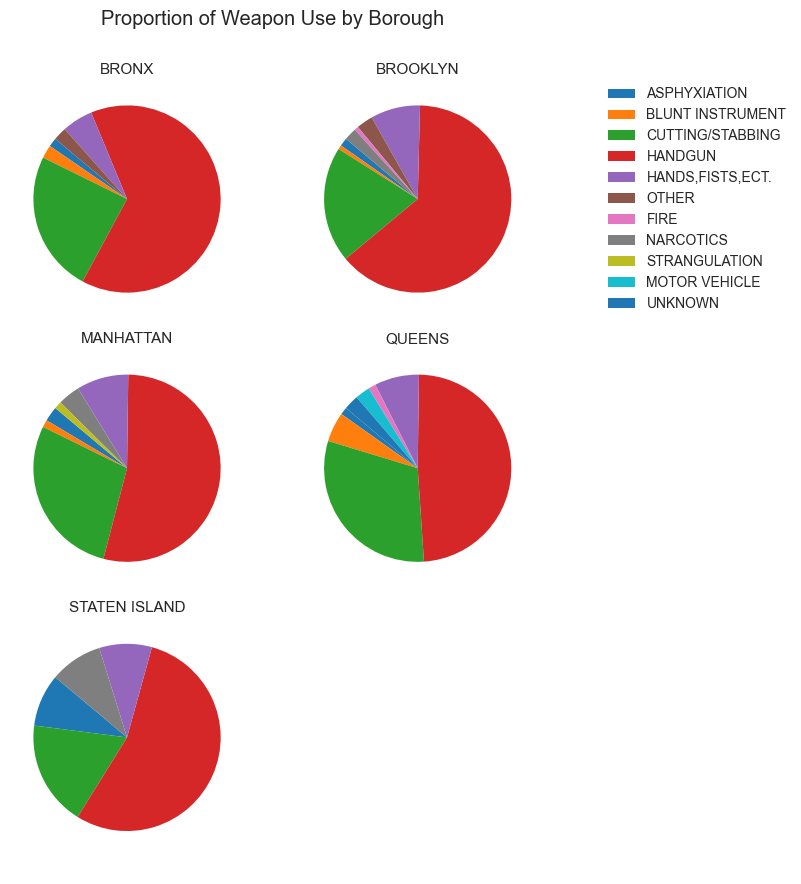

In [23]:
colors = sns.color_palette("tab10")

g = sns.FacetGrid(weapon_counts_filled, col="BOROUGH", col_wrap=2)

def draw_pie_chart(data, color, **kwargs):
    plt.pie(data, labels=None, startangle=140, pctdistance=0.85, colors=color)  # Remove labels and percentages

def add_legend(ax, colors, labels):
    ax.legend(labels, loc='center left', bbox_to_anchor=(2.5, 0.5), frameon=False)

g.map(draw_pie_chart, " ", color=colors)
g.set_titles("{col_name}")

weapon_types = weapon_counts["WEAPON USE"].unique()
add_legend(g.axes.flat[0], colors, weapon_types)

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Proportion of Weapon Use by Borough")
plt.show()


Gun violence disproportionally affects people of all communities within NYC.  In this chart, you can see how it is the leading cause of issues in each borough.

## Borough and Circumstance Analysis

In [24]:
(df
 .pipe(lambda df2: pd.crosstab(df2.BOROUGH, df2['CIRCUMSTANCE']))
 .pipe(lambda df2: df2.div(df2.sum(axis=1), axis=0))
 .mul(100)
)

CIRCUMSTANCE,DRUG RELATED TRANSACTION,GANG/ORGANIZED CRIME RELATED,OTHER,OTHER ARGUMENT,OTHER FELONY-NOT SPECIFIED,OTHER SEX OFFENSE,ROBBERY,UNKNOWN
BOROUGH,,,,,,,,
BRONX,11.450382,15.267176,21.374046,37.404580,0.000000,0.000000,11.450382,3.053435
BROOKLYN,12.857143,15.714286,26.428571,28.571429,0.714286,0.000000,1.428571,14.285714
MANHATTAN,3.846154,8.974359,30.769231,33.333333,2.564103,1.282051,10.256410,8.974359
QUEENS,14.102564,11.538462,20.512821,30.769231,0.000000,1.282051,3.846154,17.948718
STATEN ISLAND,9.090909,18.181818,18.181818,36.363636,0.000000,0.000000,0.000000,18.181818


In [25]:
ct = pd.crosstab(df['BOROUGH'], df['CIRCUMSTANCE'])

fig = make_subplots(rows=ct.shape[0], cols=1, shared_xaxes=True,
                    subplot_titles=ct.index, vertical_spacing=0.02)

for i, (borough, data) in enumerate(ct.iterrows(), start=1):
    fig.add_trace(go.Bar(x=data.index, y=data.values, name=borough), row=i, col=1)

fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=0.95))

fig.update_xaxes(title_text="Circumstances", row=ct.shape[0], col=1)
fig.update_yaxes(title_text="Frequency", row=ct.shape[0], col=1)

fig.update_layout(height=500*ct.shape[0])

fig.show()

In [26]:
df['OTHER CIRCUMSTANCE'].value_counts()

OTHER CIRCUMSTANCE
UNKNOWN                    251
WORDS EXCHANGED (DISP)      47
PREVIOUS HISTORY (DISP)     26
DISPUTE                     19
OVR GIRL/BOY(DISP)          19
UNKNOWN(DISP)               13
MONEY(DISP)                 12
OTHER(DISP)                  7
STARE/DIS(DISP)              6
ROAD RAGE (DISP)             5
ROBBERY/BURGLARY             5
NEIGHBOR (DISP)              5
DRUGS                        5
REVENGE                      4
GAMBLING(DISP)               4
RANDOM                       2
BOYFRIEND/GIRLFRIEND         2
DRUG TERRITORY (DISP)        2
GANG                         1
DRUG RIP (ROBB)              1
SEX                          1
ACCIDENTAL                   1
Name: count, dtype: int64

## Relationships Found in Data using the encoded dataframe

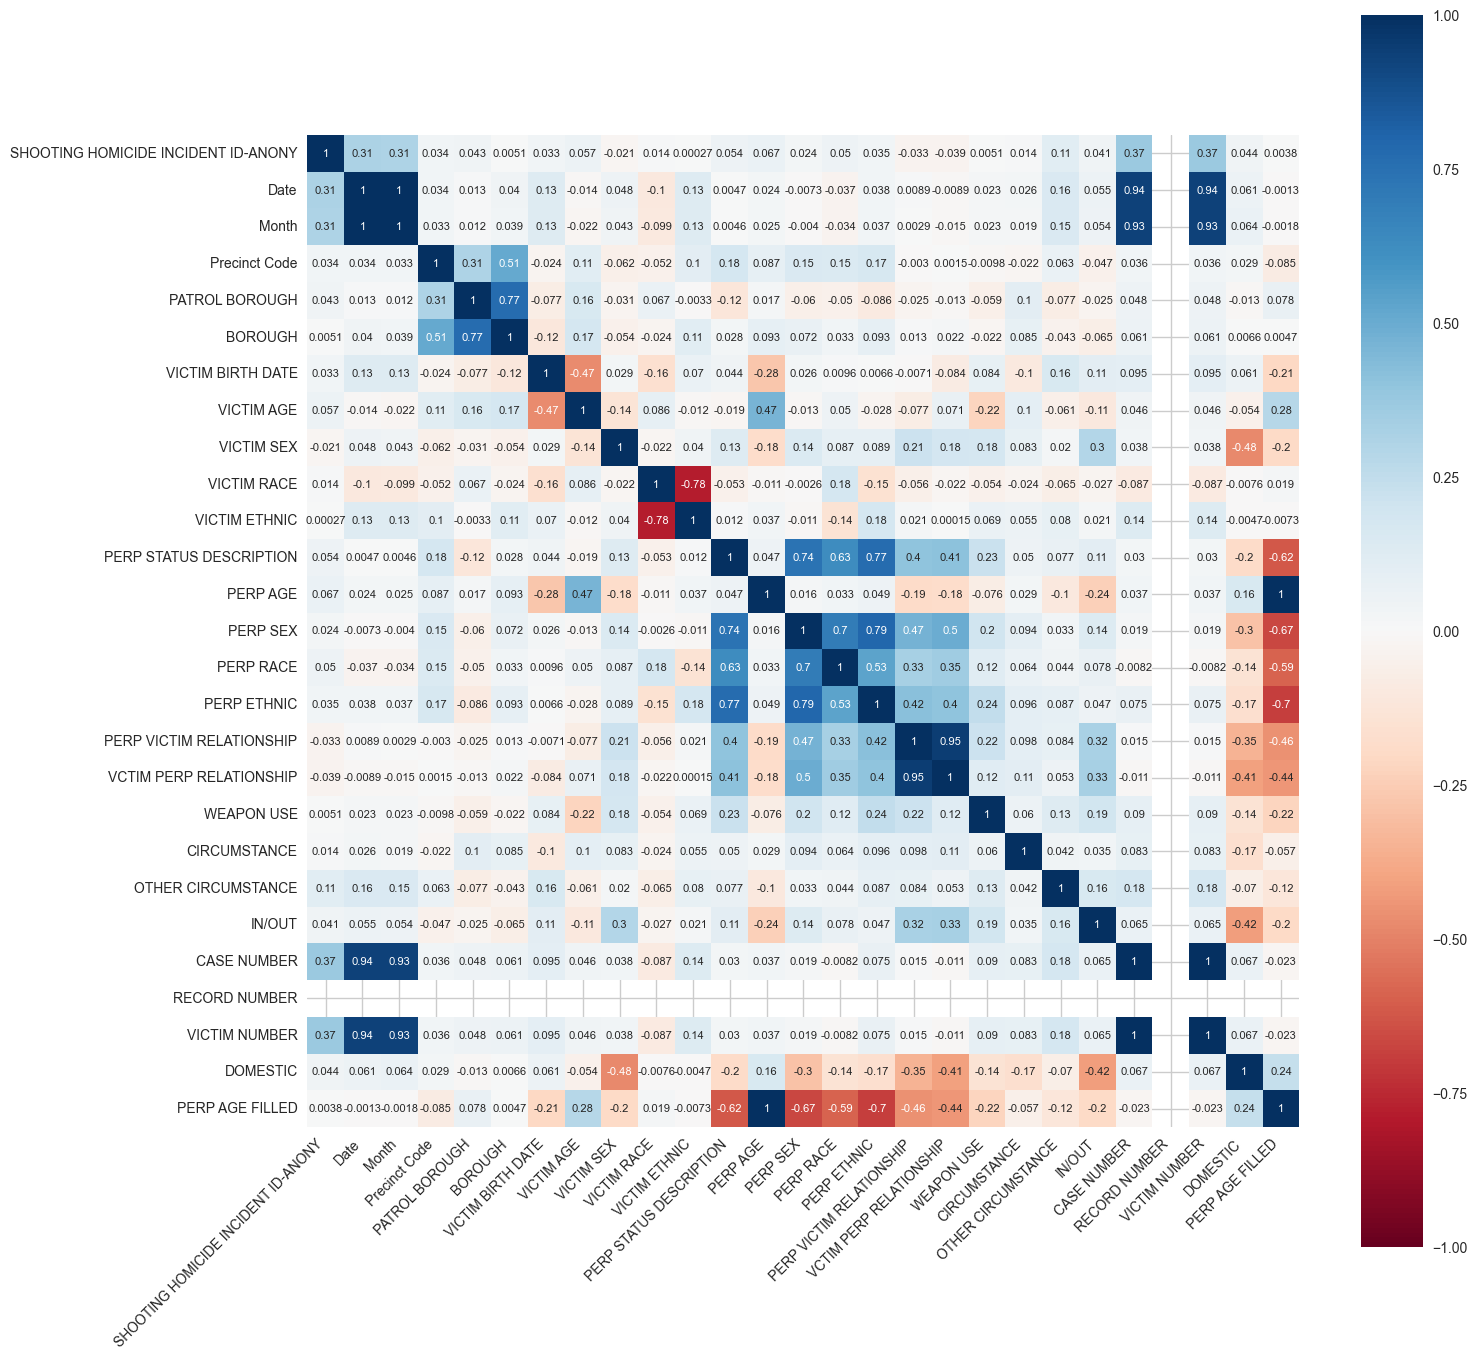

In [27]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(df_label_encoded.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True, square=True, ax=ax, annot_kws={"rotation": 0, "fontsize": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

# PCA

In [28]:
# drop date columns
df_label_encoded = df_label_encoded.drop(columns = ['Date','SHOOTING HOMICIDE INCIDENT ID-ANONY', 'VICTIM BIRTH DATE', 'RECORD NUMBER', 'CASE NUMBER', 'PERP AGE FILLED'])
X = df_label_encoded
std = preprocessing.StandardScaler()
X_std = pd.DataFrame(std.fit_transform(X), columns=X.columns)
X_std = X_std.fillna(0)
X_std

,Month,Precinct Code,PATROL BOROUGH,BOROUGH,VICTIM AGE,VICTIM SEX,VICTIM RACE,VICTIM ETHNIC,PERP STATUS DESCRIPTION,PERP AGE,...,PERP RACE,PERP ETHNIC,PERP VICTIM RELATIONSHIP,VCTIM PERP RELATIONSHIP,WEAPON USE,CIRCUMSTANCE,OTHER CIRCUMSTANCE,IN/OUT,VICTIM NUMBER,DOMESTIC
0,-1.346894,-1.011375,0.230014,0.600332,-0.686508,0.480102,-0.578883,0.568689,-0.740504,-0.810589,...,-0.810070,-0.242868,0.690916,0.686670,0.279178,0.104350,-1.058148,-1.364824,-1.728101,-0.424962
1,-0.746447,0.349503,-1.266216,-0.270348,-0.750607,0.480102,-0.578883,0.568689,-0.740504,-0.810589,...,-0.810070,-0.242868,0.456870,0.435407,0.279178,0.104350,-1.058148,0.732695,-1.720192,-0.424962
2,-1.647118,1.710380,1.227501,1.471013,0.403182,-2.023287,-1.175473,0.568689,0.013777,2.208903,...,0.993288,-1.218795,-1.415496,-1.323431,-1.126337,-0.392446,-0.478571,0.732695,-1.712283,-0.424962
3,-1.647118,0.548655,-1.266216,-0.270348,0.082685,-2.023287,0.017707,-1.716501,-0.740504,0.301855,...,-0.810070,-0.242868,0.456870,0.435407,0.279178,-0.392446,0.487392,-1.364824,-1.704374,-0.424962
4,-1.647118,-0.613069,-0.268729,-1.141029,0.915978,0.480102,-0.578883,0.568689,-0.740504,1.891062,...,0.542448,-0.242868,-1.415496,-1.323431,-1.126337,0.104350,-0.864956,-1.364824,-1.696465,-0.424962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,1.655343,-1.608833,0.728757,0.600332,1.685171,0.480102,-0.578883,0.568689,-0.740504,0.142935,...,-0.810070,-0.242868,0.924962,0.937932,0.981935,2.091531,0.487392,0.732695,1.696465,-0.424962
434,0.754672,-0.447109,-0.268729,-1.141029,1.941568,0.480102,-0.578883,0.568689,-0.740504,0.063474,...,-0.810070,-0.242868,-1.415496,-1.323431,0.981935,0.104350,0.487392,0.732695,1.704374,-0.424962
435,0.754672,1.378458,1.227501,1.471013,2.967159,0.480102,1.807478,-1.716501,-0.740504,4.513252,...,-0.810070,-0.242868,-1.415496,-1.323431,0.981935,0.104350,0.487392,-1.364824,1.712283,-0.424962
436,-1.346894,-0.447109,-0.268729,-1.141029,1.236475,-2.023287,-0.578883,0.568689,1.522338,0.000000,...,1.444127,1.708987,0.924962,0.937932,3.090207,2.091531,0.487392,0.732695,1.720192,-0.424962


In [29]:
pca = decomposition.PCA()
pca_X = pd.DataFrame(pca.fit_transform(X_std), columns=[f'PC{i+1}' for i in range(len(X.columns))])
pca_X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
0,-0.384213,-1.097954,-0.738321,1.213823,-2.203803,-0.014807,0.525675,-1.139964,1.223611,0.096022,...,-0.315483,-0.470437,0.074652,0.178637,-0.205544,0.125833,0.445030,-0.065153,-0.219276,0.022413
1,-0.053058,-1.746631,0.171300,0.995322,-1.932310,-0.163287,0.280821,-0.546402,0.013811,0.012848,...,1.299803,-0.179176,0.025744,-0.138304,-0.530824,0.082972,0.539603,0.010512,-0.588602,-0.108662
2,-1.654046,2.039567,-2.532267,0.339992,-2.245359,0.147167,-0.494501,0.963345,-1.402848,0.149911,...,-0.143051,0.643689,-0.625460,1.970820,0.926300,-0.009624,0.157966,0.018794,0.114090,-0.061752
3,-0.937108,-1.432963,-2.067623,-0.536691,-0.830207,0.069021,1.034340,1.661217,0.510704,0.645666,...,1.147945,-1.369790,-0.939945,0.613028,0.121903,-0.708948,0.780641,0.472303,0.082188,0.007417
4,-1.867632,-0.786733,-1.662306,-0.979501,-1.914678,1.768603,-1.885214,-0.446811,-0.825556,-0.277505,...,-0.408464,0.543717,-0.027134,1.011562,-0.146417,-0.181143,-0.584058,0.412676,-0.010834,-0.015757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,0.553889,1.078910,2.396851,1.685021,1.221316,2.266586,-0.407934,0.297662,1.717103,0.975546,...,-0.795190,-0.026799,0.437878,-0.517472,-0.165713,-0.240167,0.374548,-0.051257,-0.187031,-0.114430
434,-1.243475,0.295030,2.180669,-0.186113,0.720712,1.086510,-1.807126,0.502200,-0.906130,0.950518,...,-0.363279,-0.885498,0.867650,-0.702328,-0.298815,-0.688034,-0.472729,-0.006995,0.453529,-0.026018
435,-1.896632,3.349483,-1.653953,0.081386,3.011337,1.604873,-2.733356,0.862508,-1.258934,2.824151,...,0.547408,0.380980,-1.589809,0.249238,-0.377566,-0.361855,-0.059274,0.205351,0.513973,0.166302
436,3.662051,0.239991,0.408957,-1.539745,-0.222216,0.902575,-1.013763,1.641868,2.393761,1.963049,...,-0.204656,-1.332240,1.023554,0.006808,0.197820,-0.333473,-0.756791,0.052008,1.699519,0.313147


In [30]:
# Configure printing options to display numbers without scientific notation
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_.cumsum()

array([0.20588332, 0.31864701, 0.42476115, 0.51194709, 0.59276111,
       0.65447225, 0.70623011, 0.75292772, 0.79821156, 0.83724204,
       0.86746312, 0.89584172, 0.91876025, 0.93963171, 0.95774042,
       0.97045756, 0.98056124, 0.98924264, 0.99555542, 0.99840507,
       1.        ])

13 PCs cover >90% of the variance

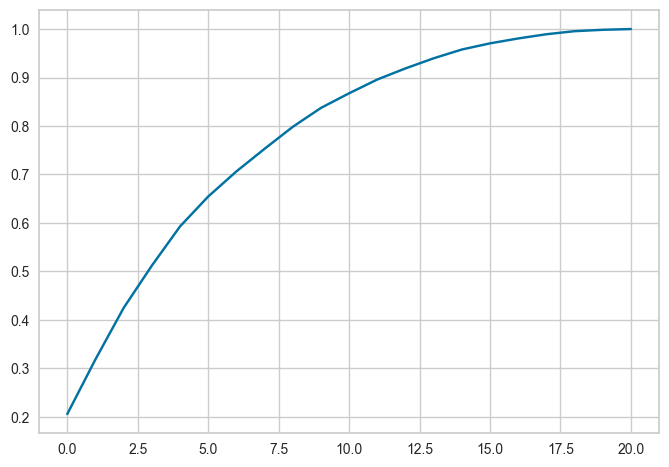

In [31]:
plt.plot(pca.explained_variance_ratio_.cumsum())

## Components 1 & 2

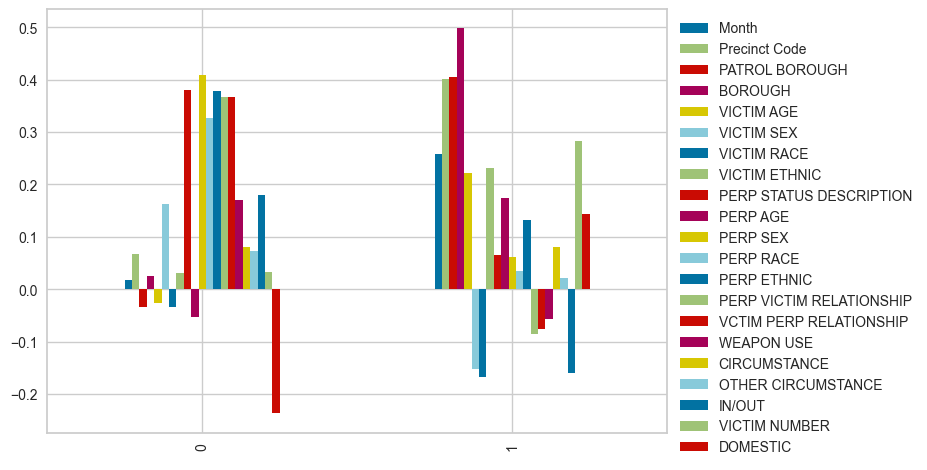

In [32]:
(pd.DataFrame(pca.components_, columns=X.columns)
 .iloc[:2]
 .plot.bar()
 .legend(bbox_to_anchor=(1,1))
 )

From this graph, in PC1, the columns that have the most positive impact are PERP STATUS DESCRIPTION, PERP SEX, PERP RACE, PERP ETHNIC, PERP VICTIM RELATIONSHIP, and VCTIM PERP RELATIONSHIP.  The columns which had the most negative impact was DOMESTIC.  

PC2's top 5 most impactful positive columns were BOROUGH, PATROL BOROUGH, Precinct Code, VICTIM NUMBER, and Month.  The column with the most negative weight was VICTIM RACE.

## Components 3 & 4

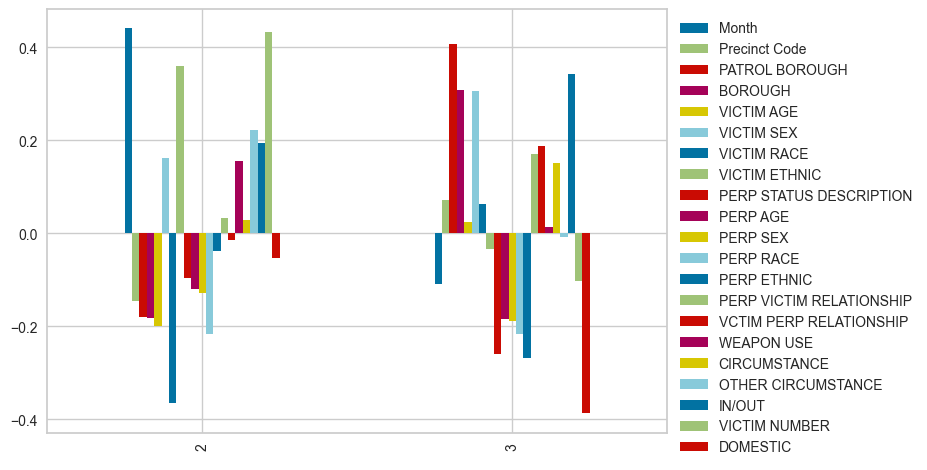

In [33]:
(pd.DataFrame(pca.components_, columns=X.columns)
 .iloc[2:4]
 .plot.bar()
 .legend(bbox_to_anchor=(1,1)))

In component 3 the most positively impactful columns are VICTIM RACE and PERP RACE.  The most negatively impactful columns are Month, VICTIM ETHNIC, and the VICTIM NUMBER.

Component 4's most positively impactful columns are DOMESTIC, PERP ETHNIC, and PERP STATUS DESCRIPTION.  The most negatively impactful columns are PATROL BOROUGH, IN/OUT, BOROUGH, and VICTIM SEX.  

## Scatterplots of PC1 vs PC2 with hue = PERP AGE

<Axes: xlabel='PC1', ylabel='PC2'>

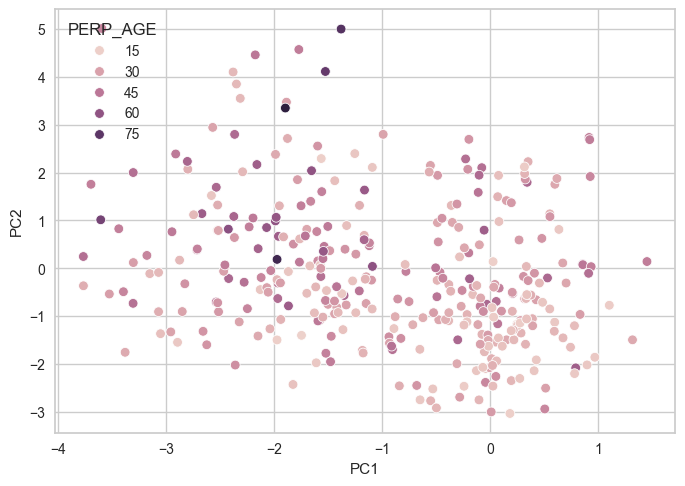

In [34]:
sns.scatterplot(x='PC1', y='PC2',
                data=pca_X.assign(PERP_AGE =X['PERP AGE']),
                hue='PERP_AGE')

<Axes: xlabel='PC1', ylabel='PC2'>

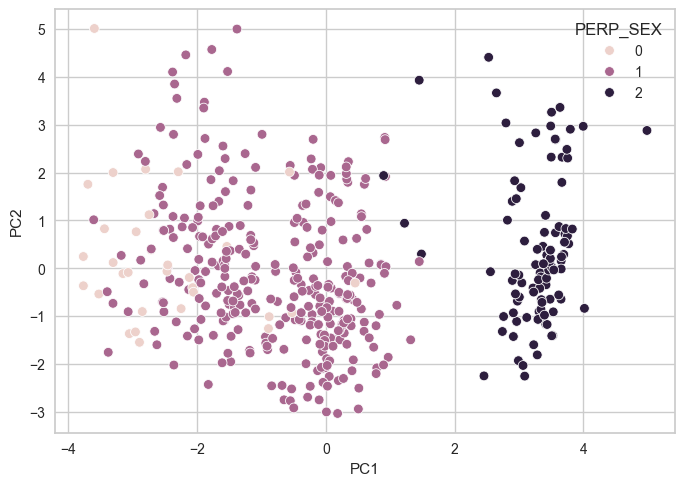

In [35]:
sns.scatterplot(x='PC1', y='PC2',
                data=pca_X.assign(PERP_SEX=X['PERP SEX']),
                hue='PERP_SEX')

# Clustering and Choosing how many Clusters to Use

<Axes: >

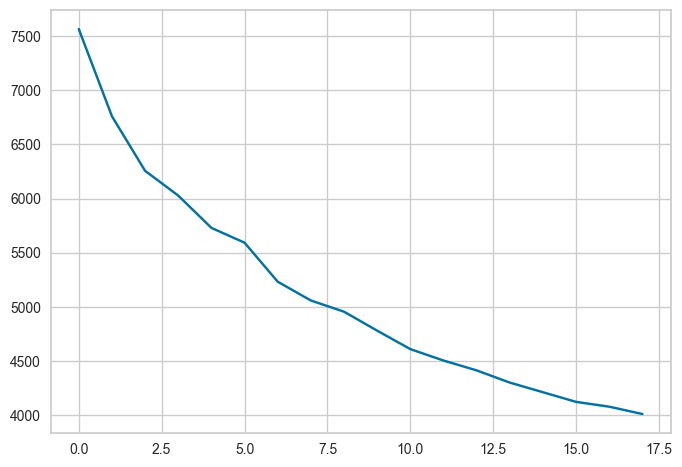

In [36]:
inerts = []
for i in range(2, 20):
    k = cluster.KMeans(n_clusters=i, random_state=42)
    k.fit(X_std)
    inerts.append(k.inertia_)

pd.Series(inerts).plot()

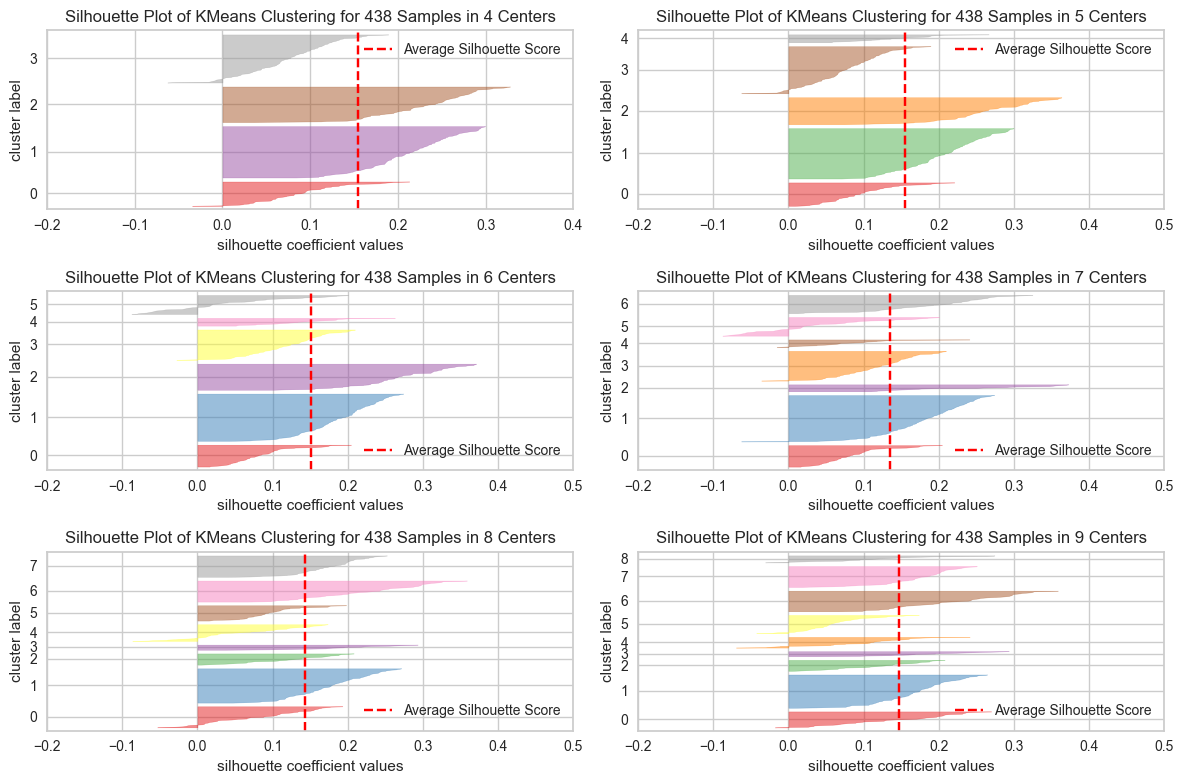

In [37]:
start, end = 4, 10
cols = 2
rows = ((end - start) // cols)
fix, axes = plt.subplots(rows, cols, figsize=(12,8))
axes = axes.reshape(cols * rows)
for i, k in enumerate(range(start, end), 0):
    ax = axes[i]
    sil = SilhouetteVisualizer(cluster.KMeans(n_clusters=k, random_state=42), ax=ax)
    sil.fit(X_std)
    sil.finalize()
plt.tight_layout()

I am choosing 8 clusters because the peaks of the silhouette score are greater than the other plots.  

In [38]:
k9 = cluster.KMeans(n_clusters=8)
k9.fit(X_std)
labels = k9.predict(X_std)

## Label the original dataframe with the clusters

In [ ]:
X.assign(label=labels)

,Month,Precinct Code,PATROL BOROUGH,BOROUGH,VICTIM AGE,VICTIM SEX,VICTIM RACE,VICTIM ETHNIC,PERP STATUS DESCRIPTION,PERP AGE,...,PERP ETHNIC,PERP VICTIM RELATIONSHIP,VCTIM PERP RELATIONSHIP,WEAPON USE,CIRCUMSTANCE,OTHER CIRCUMSTANCE,IN/OUT,VICTIM NUMBER,DOMESTIC,label
0,2,32,3,2,24,1,1,1,0,22.0,...,1,12,11,4,3,11,0,1,0,4
1,4,73,0,1,23,1,1,1,0,22.0,...,1,11,10,4,3,11,1,2,0,4
2,1,114,5,3,41,0,0,1,1,60.0,...,0,3,3,2,2,14,1,3,0,3
3,1,79,0,1,36,0,2,0,0,36.0,...,1,11,10,4,2,19,0,4,0,4
4,1,44,2,0,49,1,1,1,0,56.0,...,1,3,3,2,3,12,0,5,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,12,14,4,2,61,1,1,1,0,34.0,...,1,13,12,5,7,19,1,434,0,2
434,9,49,2,0,65,1,1,1,0,33.0,...,1,3,3,5,3,19,1,435,0,3
435,9,104,5,3,81,1,5,0,0,89.0,...,1,3,3,5,3,19,0,436,0,3
436,2,49,2,0,54,0,1,1,3,NaN,...,3,13,12,8,7,19,1,437,0,7


## Clustering Interpretation

In [ ]:
(X.assign(label=labels)
  .groupby('label')
  .agg(['mean', 'var'])
  .T
.style.background_gradient(cmap='RdBu', axis=1)
)

In [ ]:
pd.Series(labels).value_counts().sort_index()

0    23
1    25
2    88
3    95
4    83
5    50
6    49
7    25
Name: count, dtype: int64

## Clusters

Cluster 0: PERP AGE Mean 35.07, PERP SEX Mean 0.67, VICTIM AGE Mean 27.02, VICTIM SEX Mean 0.36

Cluster 1: PERP AGE Mean 38, PERP SEX Mean 0.87, VICTIM AGE Mean 44.65, VICTIM SEX Mean 0.26

Cluster 2: PERP AGE Mean 33.97, PERP SEX Mean 0.95, VICTIM AGE Mean 35.05, VICTIM SEX Mean 0.96

Cluster 3: PERP AGE Mean NA, PERP SEX Mean 2, VICTIM AGE Mean 33.67, VICTIM SEX Mean 0.92

Cluster 4: PERP AGE Mean 33.74, PERP SEX Mean 0.91, VICTIM AGE Mean 40.35, VICTIM SEX Mean 0.81

Cluster 5: PERP AGE Mean 28.30, PERP SEX Mean 0.97, VICTIM AGE Mean 32.28, VICTIM SEX Mean 0.85

Cluster 6: PERP AGE Mean 29.42, PERP SEX Mean 0.97, VICTIM AGE Mean 34.34, VICTIM SEX Mean 0.94

Cluster 7: PERP AGE Mean NA, PERP SEX Mean 2, VICTIM AGE Mean 36.78, VICTIM SEX Mean 0.87

# Conclusions

In conclusion, I found that the 2022 NYC Homicide Data provided some curious insights to what is going on within America's densest city.  The busiest patrol borough based on frequency was found to be the Bronx, however, Brooklyn was the deadliest borough overall.  This is probably due Brooklyn's patrol borough being split up into the North and South, covering a larger area.  Another insight that was previously covered was that gun violence is as prevalent as ever and the leading cause of homicide across all boroughs in New York City.  As for the circumstances of each homicide, a large concentration of the problems arose from "other arguments" which sheds some insight into how many of the disputes may be caused from relatively insigificant interactions.  Lastly, it was interesting to see how there was strong positive corrleation between perpetrator and victim ages.  If there were more continuous variables within the data that could have the potential to explain the relationships between the two and see what other variables may explain this.  Those datapoints could include (but not limited to) a separate dataset that broke the boroughs down into districts and included education level as well as average salaries per household in that area.  This could help paint a more clear picture to the root causes of why these arguments could be arising and what target demographic should be of focus when it comes to attempting to rehabilitate those perpetrators.